# HSV colorspace

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in RGB image

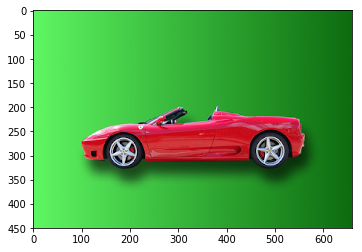

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen2.jpg')

plt.imshow(image)

### RGB threshold 

Visualize the green threshold you defined in the previous, consistent green color case.

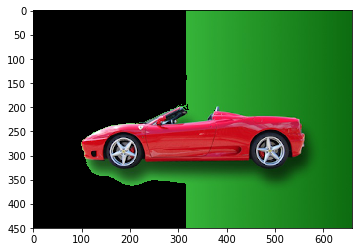

In [3]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])

# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

### Convert to HSV

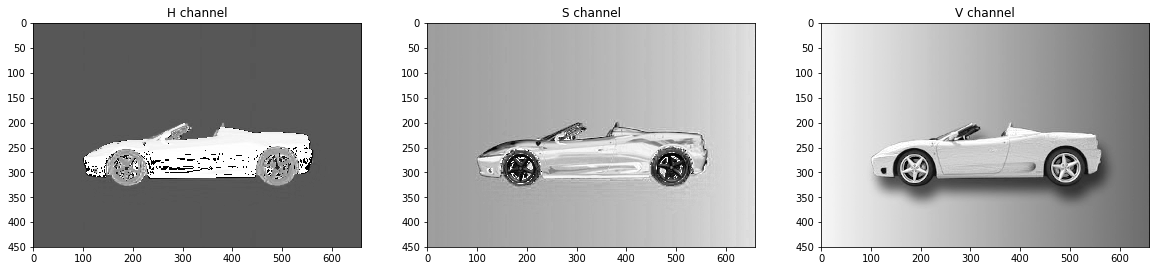

In [4]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

# Visualize the individual color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')

### Mask the green area using HSV color space

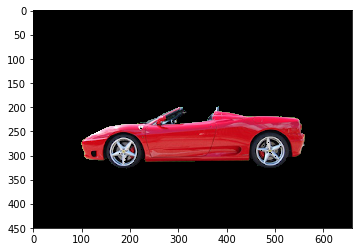

In [19]:
# Find the background hue
background_hue = h[10,10]

# Define our color selection boundaries in HSV values
lower_hue = np.array([background_hue-10,0,0]) 
upper_hue = np.array([background_hue+10,255,255])

# Define the masked area
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask_hsv != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)

In [20]:
### Mask and add a background image

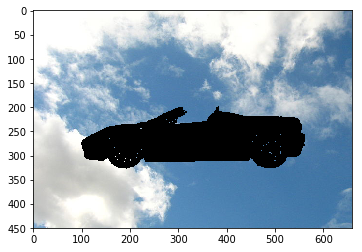

In [21]:
# Load in a background image, and convert it to RGB 
background_image = cv2.imread('images/sky.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)

# Get height from image 
height = image.shape[0]
# Get width from image 
width = image.shape[1]
# Crop it or resize the background to be the right size
crop_background = background_image[0:height, 0:width]

# Mask the cropped background so that the car area is blocked
crop_background[mask_hsv== 0] = [0, 0, 0]

# Display the background and make sure 
plt.imshow(crop_background)


In [22]:
### Create a complete image

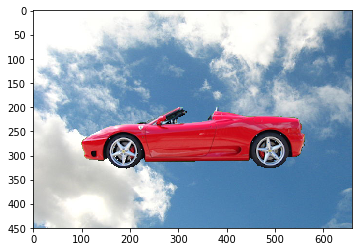

In [11]:
# Add the two images together to create a complete image!
complete_image = masked_image + crop_background
plt.imshow(complete_image)